In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('/Users/Shane/Downloads/PortfolioProjects/Movie_Correlation_In_Python/Movie_Data.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00


In [3]:
df.info()
# shape (7668, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# looking for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {pct_missing*100}%")

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


In [5]:
# new data without NULL data
new_df = df.dropna()
new_df.shape


(5421, 15)

In [6]:
pct_left = (new_df.shape[0]/df.shape[0])
pct_left
# 70% data left

0.706964006259781

In [7]:
# getting Year as a new column
new_df['yearcorrect'] = new_df['released'].str.extract(pat = '([0-9]{4})').astype(int)

/var/folders/dk/2pv9nz_d0v72bgh4y7t9hq140000gn/T/ipykernel_45515/3714296286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['yearcorrect'] = new_df['released'].str.extract(pat = '([0-9]{4})').astype(int)


In [8]:
new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,927000.00,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.00,46998772.00,Warner Bros.,146.00,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,65000.00,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.00,58853106.00,Columbia Pictures,104.00,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,1200000.00,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.00,538375067.00,Lucasfilm,124.00,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,221000.00,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.00,83453539.00,Paramount Pictures,88.00,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,108000.00,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.00,39846344.00,Orion Pictures,98.00,1980


In [9]:
# drop any duplicates
new_df_noduplicate = new_df.drop_duplicates()
new_df_noduplicate.shape
# (5421, 16) --> no duplicate

(5421, 16)

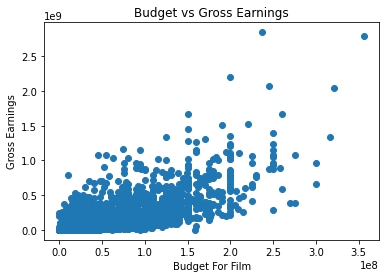

In [10]:
# scatter plot
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()

In [11]:
new_df.sort_values(by=['gross'], ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,1100000.00,James Cameron,James Cameron,Sam Worthington,United States,237000000.00,2847246203.00,Twentieth Century Fox,162.00,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,903000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.00,2797501328.00,Marvel Studios,181.00,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,1100000.00,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.00,2201647264.00,Twentieth Century Fox,194.00,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,876000.00,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.00,2069521700.00,Lucasfilm,138.00,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,897000.00,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.00,2048359754.00,Marvel Studios,149.00,2018


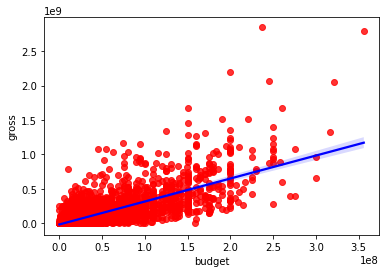

In [12]:
sns.regplot(x='budget', y='gross', data=new_df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.show()

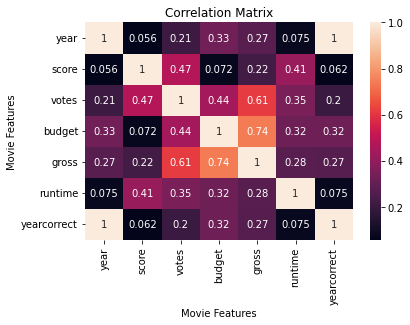

In [13]:
# correlation matrix heatmap
sns.heatmap(new_df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [14]:
# transform string columns to numeric
new_df_numerised = new_df

for col in new_df_numerised:
    if (new_df_numerised[col].dtype == 'object'):
        new_df_numerised[col] = new_df_numerised[col].astype('category').cat.codes

new_df_numerised.head()

/var/folders/dk/2pv9nz_d0v72bgh4y7t9hq140000gn/T/ipykernel_45515/2838033208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_numerised[col] = new_df_numerised[col].astype('category').cat.codes


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.40,927000.00,1795,2832,699,46,19000000.00,46998772.00,1426,146.00,1980
1,3929,6,1,1980,1127,5.80,65000.00,1578,1158,214,47,4500000.00,58853106.00,452,104.00,1980
2,3641,4,0,1980,1359,8.70,1200000.00,757,1818,1157,47,18000000.00,538375067.00,945,124.00,1980
3,204,4,4,1980,1127,7.70,221000.00,889,1413,1474,47,3500000.00,83453539.00,1108,88.00,1980
4,732,6,4,1980,1170,7.30,108000.00,719,351,271,47,6000000.00,39846344.00,1083,98.00,1980


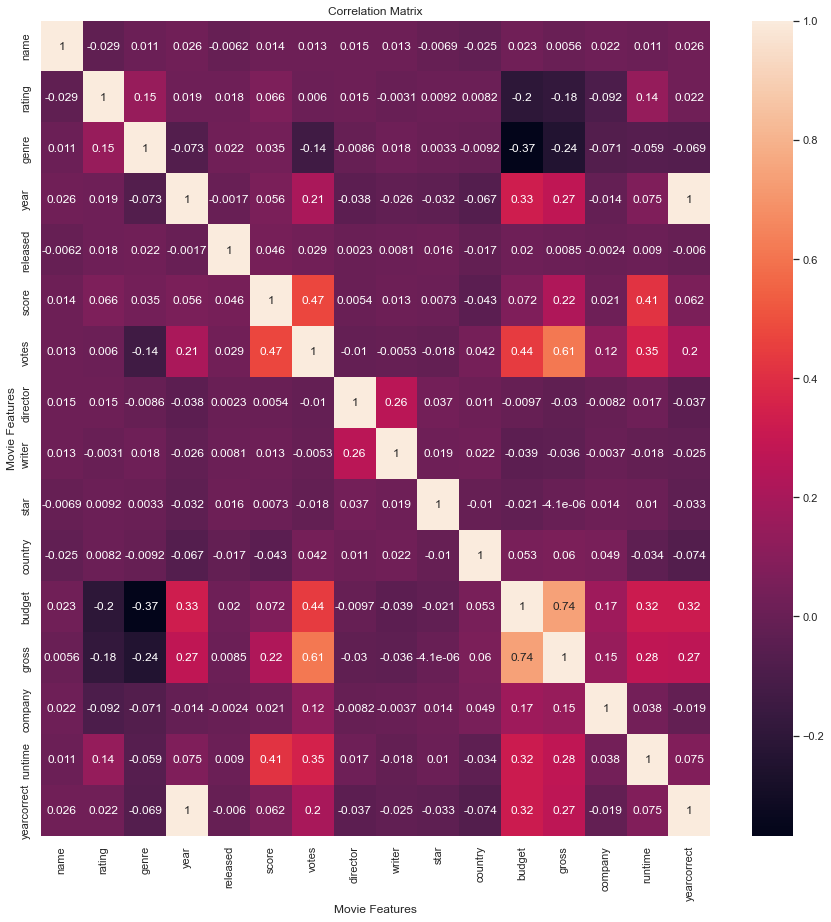

In [21]:
# correlation matrix heatmap
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(new_df_numerised.corr(), annot=True, )
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# budget and gross have highest correlation

In [16]:
# show corr pairs > 0.5 for easier reference
correlation_mat = new_df_numerised.corr()
corr_pairs = correlation_mat.unstack().sort_values(ascending=False)
high_corr = corr_pairs[(corr_pairs) > 0.5]
high_corr

name         name          1.00
rating       rating        1.00
runtime      runtime       1.00
company      company       1.00
gross        gross         1.00
budget       budget        1.00
country      country       1.00
star         star          1.00
writer       writer        1.00
director     director      1.00
votes        votes         1.00
score        score         1.00
released     released      1.00
year         year          1.00
genre        genre         1.00
yearcorrect  yearcorrect   1.00
             year          1.00
year         yearcorrect   1.00
budget       gross         0.74
gross        budget        0.74
             votes         0.61
votes        gross         0.61
dtype: float64